In [1]:
import numpy as np
from scipy.stats import linregress

In [7]:
!easy_install -U statsmodels

Searching for statsmodels
Reading https://pypi.python.org/simple/statsmodels/
Best match: statsmodels 0.8.0rc1
Processing statsmodels-0.8.0rc1.tar.gz
Writing /tmp/easy_install-zurhnlpr/statsmodels-0.8.0rc1/setup.cfg
Running statsmodels-0.8.0rc1/setup.py -q bdist_egg --dist-dir /tmp/easy_install-zurhnlpr/statsmodels-0.8.0rc1/egg-dist-tmp-i8ix6ve9
package init file 'statsmodels/tsa/vector_ar/data/__init__.py' not found (or not a regular file)
no previously-included directories found matching '*/__pycache__'
In file included from /usr/local/lib/python3.4/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1777:0,
                 from /usr/local/lib/python3.4/dist-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /usr/local/lib/python3.4/dist-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from statsmodels/nonparametric/linbin.c:250:
/usr/local/lib/python3.4/dist-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warn

In [2]:
slope, intercept, r_value, p_value, stderr_slope = linregress([1,2,3,4,8,90,100], [1,5,6,8,9,100,80])

In [3]:
slope

0.90920874259756934

# Advanced Linear Regression

In [4]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
fsc = pd.read_csv('dati/fandango_score_comparison.csv')

Statsmodels is a library which allows for rigorous statistical analysis in python. For linear models, statsmodels provides ample statistical measures for proper evaluation. The class sm.OLS is used to fit linear models, standing for ordinary least squares. After the initialization of our model we fit data to it using the .fit() method that estimates the coefficients of the linear model. OLS() does not automatically add an intercept to our model. We can add a column of 1's to add another coefficient to our model and since the coefficient is multiplied by 1 we are given an intercept.

In [6]:
fsc.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [8]:
y = fsc['Metacritic_User']
X = fsc[['Metacritic', 'Fandango_Stars', 'Fandango_Ratingvalue']]
X = sm.add_constant(X)

In [9]:
# OLS -- Ordinary Least Squares Fit
linear = sm.OLS(y, X)
# fit model
linearfit = linear.fit()
linearfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Metacritic_User   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     62.47
Date:                Mon, 22 Aug 2016   Prob (F-statistic):           8.19e-26
Time:                        14:34:05   Log-Likelihood:                -205.47
No. Observations:                 146   AIC:                             418.9
Df Residuals:                     142   BIC:                             430.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8839      0.660      1.339      0.183      -0.421       2.189
Metacritic               0.0530      0.004     12.214      0.000       0.044       0.062
Fandango_Stars           0.2323      0.549      0.423      0.673      -0.852       1.317
Fandango_Ratingvalue     0.4084      0.589      0.693      0.489      -0.756       1.573
==============================================================================
Omnibus:                        2.257   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.324   Jarque-Bera (JB):                1.947
Skew:                           0.109   Prob(JB):                        0.378
Kurtosis:                       3.522   Cond. No.                         599.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
yhat = linearfit.predict(X)
residuals = y - yhat
np.mean(residuals)

1.0839122597949988e-13

(array([  3.,   9.,  14.,  27.,  35.,  35.,  14.,   5.,   3.,   1.]),
 array([-2.64244206, -2.05479525, -1.46714843, -0.87950162, -0.29185481,
         0.295792  ,  0.88343881,  1.47108562,  2.05873243,  2.64637924,
         3.23402605]),
 <a list of 10 Patch objects>)

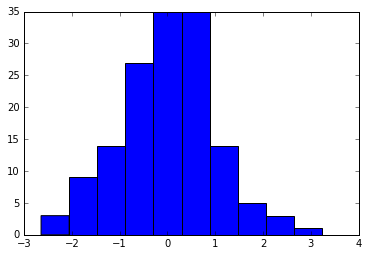

In [11]:
plt.hist(residuals)

In [12]:
# sum the (predicted - observed) squared
SSE = np.sum((yhat-y.values)**2)
# Average y
ybar = np.mean(y.values)

# sum the (mean - predicted) squared
RSS = np.sum((ybar-yhat)**2)

# sum the (mean - observed) squared
TSS = np.sum((ybar-y.values)**2)

In [13]:
# R-square:
R2 = RSS/TSS
print(R2)

0.568923911631


In [14]:
# Coefficients of the Linear Model
linearfit.params

const                   0.883909
Metacritic              0.052969
Fandango_Stars          0.232267
Fandango_Ratingvalue    0.408437
dtype: float64